## Preprocessing and training Data:

The next step, processing and training the data, involves preparing the dataset for model training. This includes 

**Normalizing or scaling features**:Adjusts numerical values to a common scale, typically between 0 and 1 or with zero mean and unit variance, to ensure features contribute equally to the model.

**Encoding categorical variables**:Converts categorical data (such as labels or categories) into numerical form, often using techniques like one-hot encoding or label encoding, so they can be used in machine learning algorithms.

**Splitting the data into training and testing sets**:Divides the dataset into two parts—one for training the model (learning patterns) and the other for testing (evaluating the model's performance).

Once the data is cleaned and prepared, we will train various supervised machine learning models on the data to learn patterns and relationships, and then evaluate its performance on the test set.

In [84]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score,f1_score, make_scorer
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [85]:
sc_df = pd.read_csv('sc_df.csv', index_col=False)

In [86]:
sc_df.head()

,LeagueIndex,APM,SelectByHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,ActionsInPAC,ActionLatency,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,TotalMapExplored,ComplexAbilityUsed,MaxTimeStamp
0,5,143.7180,0.003515,0.000055,0.000110,0.000392,4.7508,40.8673,0.001397,0.000047,0.0,0.000220,0.000000,127448
1,5,129.2322,0.003304,0.000069,0.000294,0.000432,4.8434,42.3454,0.001193,0.000087,0.0,0.000381,0.000208,57812
2,4,69.9612,0.001101,0.000042,0.000294,0.000461,4.0430,75.3548,0.000745,0.000063,0.0,0.000231,0.000189,95360
3,3,107.6016,0.001034,0.000011,0.000053,0.000543,4.9155,53.7352,0.000426,0.000075,0.0,0.000202,0.000384,93852
4,3,122.8908,0.001136,0.000039,0.000000,0.001329,9.3740,62.0813,0.001174,0.000077,0.0,0.000289,0.000019,51936


In [87]:
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeagueIndex         3394 non-null   int64  
 1   APM                 3394 non-null   float64
 2   SelectByHotkeys     3394 non-null   float64
 3   UniqueHotkeys       3394 non-null   float64
 4   MinimapAttacks      3394 non-null   float64
 5   MinimapRightClicks  3394 non-null   float64
 6   ActionsInPAC        3394 non-null   float64
 7   ActionLatency       3394 non-null   float64
 8   WorkersMade         3394 non-null   float64
 9   UniqueUnitsMade     3394 non-null   float64
 10  ComplexUnitsMade    3394 non-null   float64
 11  TotalMapExplored    3394 non-null   float64
 12  ComplexAbilityUsed  3394 non-null   float64
 13  MaxTimeStamp        3394 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 371.3 KB


Standardize the numeric variables for ML modeling but remove the target, LeagueIndex, since it's categorical.

In [89]:
numeric_columns= sc_df.select_dtypes(include = ['int64','float64']).columns.drop(['LeagueIndex'])

scaler = StandardScaler()

numeric_columns_standardized= scaler.fit_transform(sc_df[numeric_columns])

numeric_columns_standardized = pd.DataFrame(numeric_columns_standardized, columns = numeric_columns)

numeric_columns_standardized['LeagueIndex'] = sc_df['LeagueIndex']

sc_df_scaled = numeric_columns_standardized

Check the new scaled dataset.

In [91]:
sc_df_scaled.head()

,APM,SelectByHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,ActionsInPAC,ActionLatency,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,TotalMapExplored,ComplexAbilityUsed,MaxTimeStamp,LeagueIndex
0,0.513336,-0.148405,-0.099733,0.070281,0.012774,-0.349351,-1.188855,0.702967,-1.517513,-0.534744,-0.725492,-0.534634,1.309047,5
1,0.234463,-0.188400,0.272576,1.181617,0.119196,-0.287404,-1.112026,0.311624,0.078893,-0.534744,1.132028,0.248141,-0.769784,5
2,-0.906593,-0.605245,-0.438195,1.179004,0.196051,-0.822848,0.603740,-0.553434,-0.877330,-0.534744,-0.598368,0.177206,0.351130,4
3,-0.181959,-0.618029,-1.250504,-0.270882,0.413568,-0.239171,-0.520006,-1.166846,-0.403270,-0.534744,-0.924713,0.911898,0.306111,3
4,0.112381,-0.598637,-0.526716,-0.592443,2.496292,2.743434,-0.086192,0.275014,-0.306027,-0.534744,0.072731,-0.461851,-0.945200,3


Separate the features from the target and the training data from the test data.

In [93]:
X = sc_df_scaled.drop(columns = ['LeagueIndex', 'MaxTimeStamp'])
y = sc_df_scaled['LeagueIndex']

In [94]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = .2, random_state = 42)

Check the shape of the training and testing data.

In [95]:
X_train.shape

(2715, 12)

In [96]:
X_test.shape

(679, 12)

## Modeling:

Now that we've preprocessed and split our data, its time to gather insight from it using various models.








**Random Forest**: Handles non-linear relationships and feature importance well, making it suitable for datasets with a variety of features.


Create the parameters.

In [98]:
param_grid = {'n_estimators':[100, 200, 300],
              'max_depth':[None, 3, 10, 20, 30], 
              'min_samples_split':[2, 5, 10, 20]}

In [99]:
rf_class = RandomForestClassifier(random_state = 42)

In [100]:
grid_search_rf = GridSearchCV(estimator = rf_class, 
                              param_grid = param_grid, 
                              cv = 5,
                              scoring='accuracy', 
                              n_jobs = -1)

Fit the data into the model.

In [101]:
grid_search_rf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [102]:
best_rf = grid_search_rf.best_estimator_

In [103]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
0.3998149282521147


**Gradient Boosting**: Able to iteratively improve performance by focusing on misclassified instances, which is helpful for complex datasets with subtle patterns.

Create the parameters.

In [105]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]}

In [106]:
gb_class = GradientBoostingClassifier(random_state = 42)

In [107]:
grid_search_gb = GridSearchCV( 
    estimator=gb_class, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    scoring= 'accuracy')

Fit the data into the model.

In [108]:
grid_search_gb.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [109]:
best_gb = grid_search_gb.best_estimator_

In [110]:
print(grid_search_gb.best_params_)
print(grid_search_gb.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
0.39097753507022737


**SVM**: Excels at separating classes by finding the best possible boundary, making it a strong choice for datasets where the classes are well-structured but may not be easily separable by simple lines.

Create the parameters.

In [112]:
param_grid = {
    'C': [0.1, 1, 10],        
    'gamma': [0.01, 0.1, 1],  
    'kernel': ['rbf']}

In [113]:
svm_class = SVC(random_state=42)

In [114]:
grid_search_svm = GridSearchCV(
    estimator=svm_class, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    scoring='accuracy')

Fit the data into the model.

In [115]:
grid_search_svm.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [116]:
best_svm = grid_search_svm.best_estimator_

In [117]:
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.38921240241375266


With an accuracy of .399, the random forest classifer was the best predictice model. I also experimented with using f1 score instead of accuracy, but received slighly lower scores.

**Deep Learning**: Models complex and non-linear relationships in the data, leveraging its multi-layered structure to uncover patterns that simpler algorithms might miss.


Adjust the number of categories in y so that it reflects values 0-7.

In [202]:
X = sc_df.drop(columns=["LeagueIndex"])
y = sc_df["LeagueIndex"]

y_adjusted = y - y.min()


Standardize the data with y_adjusted and do a train_test split.

In [208]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted
)

# Verify the new labels and splits
print(f"New labels range: {y_adjusted.min()} to {y_adjusted.max()}")
print(f"Unique labels in y_train: {np.unique(y_train)}")
print(f"Unique labels in y_test: {np.unique(y_test)}")

New labels range: 0 to 7
Unique labels in y_train: [0 1 2 3 4 5 6 7]
Unique labels in y_test: [0 1 2 3 4 5 6 7]


Import the necessary packages and build a neural net.

In [211]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  
    Dropout(0.2),  
    Dense(32, activation='relu'), 
    Dense(len(np.unique(y_train)), activation='softmax')  
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fit, train, and run the data.

In [218]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train, 
    validation_split=0.2,  
    epochs=20,  
    batch_size=32,  
    verbose=1
)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4206 - loss: 1.3291 - val_accuracy: 0.3849 - val_loss: 1.3720
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.4289 - loss: 1.3189 - val_accuracy: 0.3923 - val_loss: 1.3744
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.4263 - loss: 1.3368 - val_accuracy: 0.3812 - val_loss: 1.3832
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.4195 - loss: 1.3391 - val_accuracy: 0.3831 - val_loss: 1.3706
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.4532 - loss: 1.3262 - val_accuracy: 0.3757 - val_loss: 1.3778
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.4427 - loss: 1.2996 - val_accuracy: 0.3757 - val_loss: 1.3777
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.4171 - loss: 1.3382 - val_accuracy: 0.3775 - val_loss: 1.3747
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.4485 - loss: 1.3146 - val_accuracy: 0.38

Visualize the results.

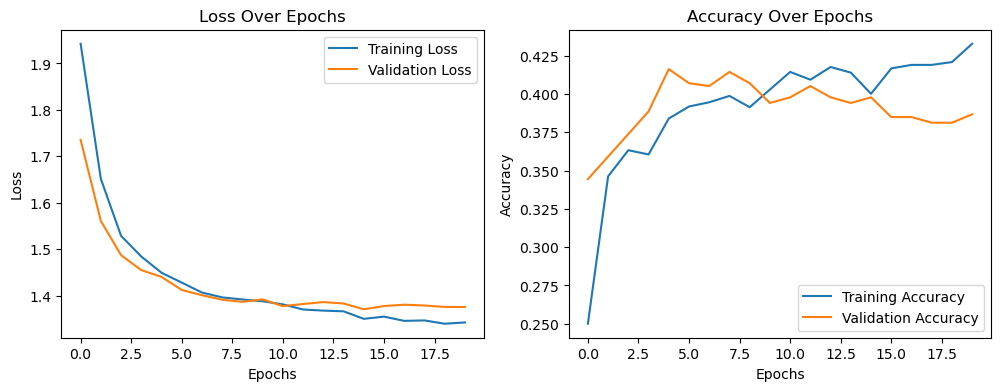

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Conclusion:

The models showed that predicting skill levels in StarCraft II isn’t straightforward, which highlights how balanced and complex the game really is. Over the course of training, the model’s loss steadily decreased and accuracy temporarily improved, showing that it was learning meaningful patterns from the data. However, the moderate final accuracy indicates that no single stat carries enough weight to fully predict a player’s skill level. Instead, skill in StarCraft II comes from a mix of strategy, mechanics, and decision-making, making it tough for a model to display. It’s a great reminder of why this game is so popular for AI experimentation— it rewards versatility and depth, not just one dominant factor.